In [1]:
#import library for visualization and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [76]:
#read data to dataframe
trans = pd.read_csv('dh_transactions.csv')
prod = pd.read_csv('dh_product_lookup.csv')
store = pd.read_csv('dh_store_lookup.csv')
casusal = pd.read_csv('dh_causal_lookup.csv')

Starting exploratory data from transaction which descript the action in retail store

In [77]:
#sneak for qucik understand data in columns
trans.tail(5)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0
5197680,1510000073,0.99,1,2209,1,104,435755,18,3316349,728,0


In [78]:
#check null value and data type
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [5]:
trans.isnull().sum()

upc                    0
dollar_sales           0
units                  0
time_of_transaction    0
geography              0
week                   0
household              0
store                  0
basket                 0
day                    0
coupon                 0
dtype: int64

In [6]:
trans.duplicated().sum()

0

transaction data not found any empty or duplicate data

In [7]:
trans.shape

(5197681, 11)

In [8]:
trans.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')

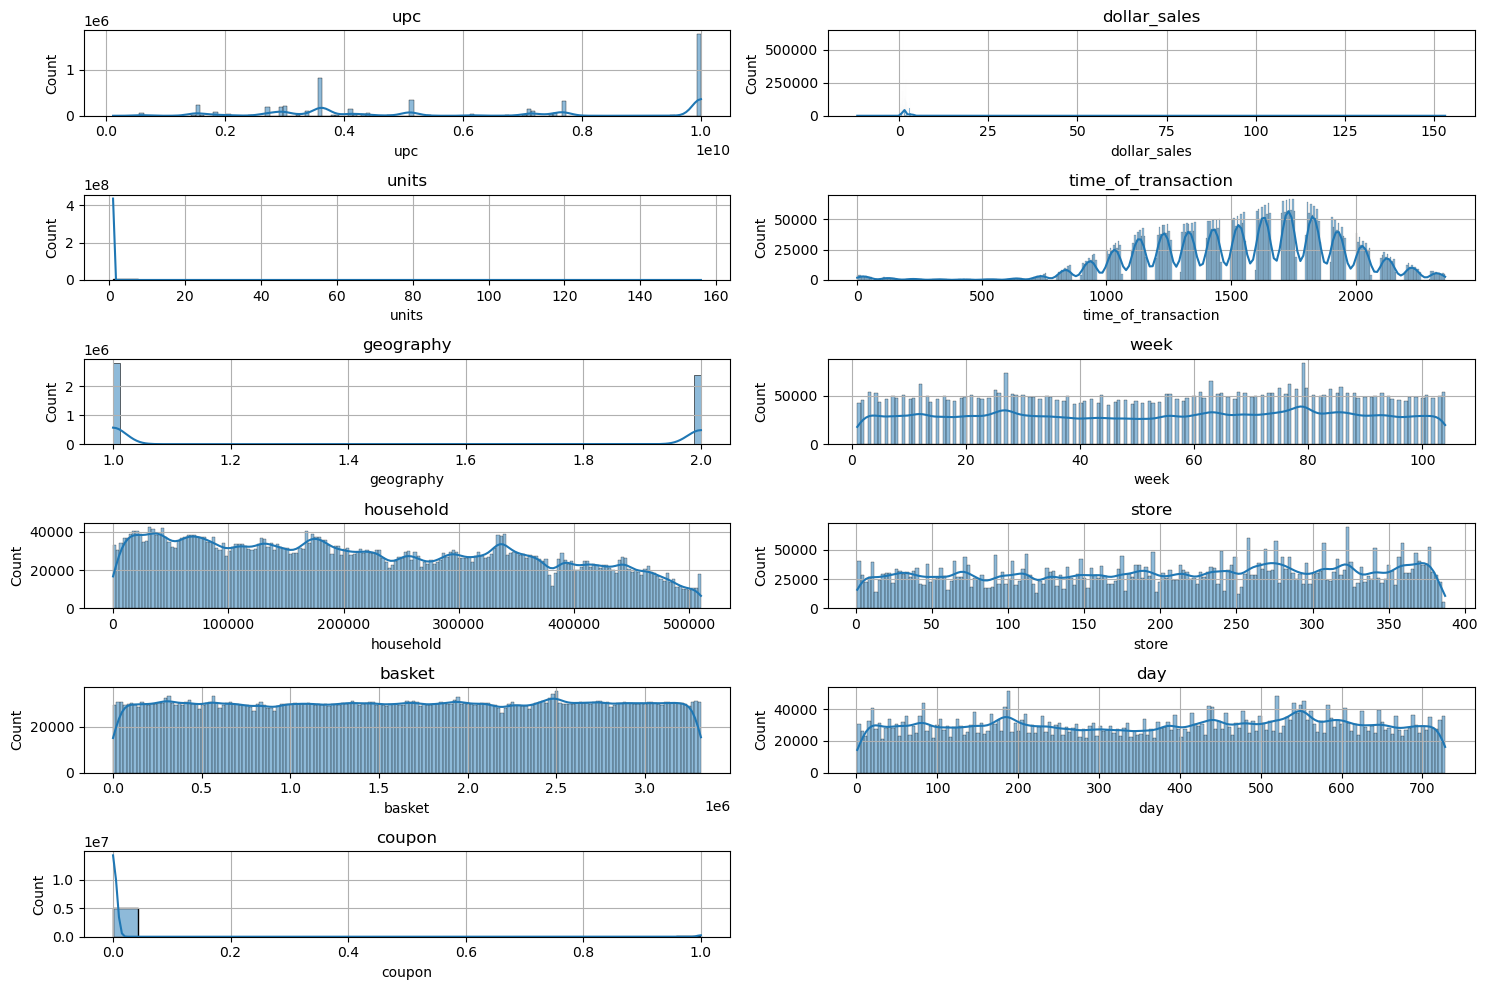

In [9]:
#explore by plot histrogram of every data first 11 columns
plt.figure(figsize=(15,10))

for i, col in enumerate(trans.columns):
    plt.subplot(6,2, i+1)
    sb.histplot(trans[col], kde=True)
    plt.title(col)
    plt.grid()
    
plt.tight_layout()


In [10]:
trans.describe()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
count,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06,5.197681e+06
mean,6.203548e+09,1.756568e+00,1.196616e+00,1.543559e+03,1.459126e+00,5.322320e+01,2.231376e+05,2.020152e+02,1.662961e+06,3.695358e+02,1.754398e-02
std,3.152023e+09,1.128989e+00,5.686024e-01,3.850193e+02,4.983265e-01,3.005075e+01,1.412164e+05,1.119982e+02,9.593189e+05,2.103872e+02,1.312867e-01
min,1.111124e+08,-1.176000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.620000e+09,9.900000e-01,1.000000e+00,1.258000e+03,1.000000e+00,2.700000e+01,9.905300e+04,1.050000e+02,8.299060e+05,1.850000e+02,0.000000e+00
50%,5.100013e+09,1.500000e+00,1.000000e+00,1.602000e+03,1.000000e+00,5.500000e+01,2.096940e+05,2.090000e+02,1.666884e+06,3.800000e+02,0.000000e+00
75%,9.999982e+09,2.190000e+00,1.000000e+00,1.825000e+03,2.000000e+00,7.900000e+01,3.395680e+05,3.000000e+02,2.496495e+06,5.510000e+02,0.000000e+00
max,9.999986e+09,1.531400e+02,1.560000e+02,2.359000e+03,2.000000e+00,1.040000e+02,5.100270e+05,3.870000e+02,3.316349e+06,7.280000e+02,1.000000e+00


In [79]:
# add month, quarter, year time for bettwer to understand big picture of the company
trans['year'] = ((trans['day'] // 365) + 1).astype(int)
trans['month'] = ((trans['week'] // 4.34812141) + 1).astype(int)
trans['quarter'] = (((trans['month']-1) // 3 ) + 1).astype(int)
trans.groupby(['year', 'month','quarter'])['dollar_sales'].sum().to_frame()

dollar_sales
year month quarter              
1    1     1           355800.56
     2     1           338981.78
     3     1           446356.19
     4     2           336221.87
     5     2           355179.14
     6     2           467920.58
     7     3           388844.57
     8     3           347594.91
     9     3           404176.66
     10    4           309445.35
     11    4           314179.05
     12    4           383550.17
2    13    5           335084.82
     14    5           335106.50
     15    5           465270.66
     16    6           351028.53
     17    6           360508.73
     18    6           496167.77
     19    7           409095.48
     20    7           378500.98
     21    7           432831.76
     22    8           347673.75
     23    8           418095.20
     24    8           352464.88

# Company big picture

Start with sales performance

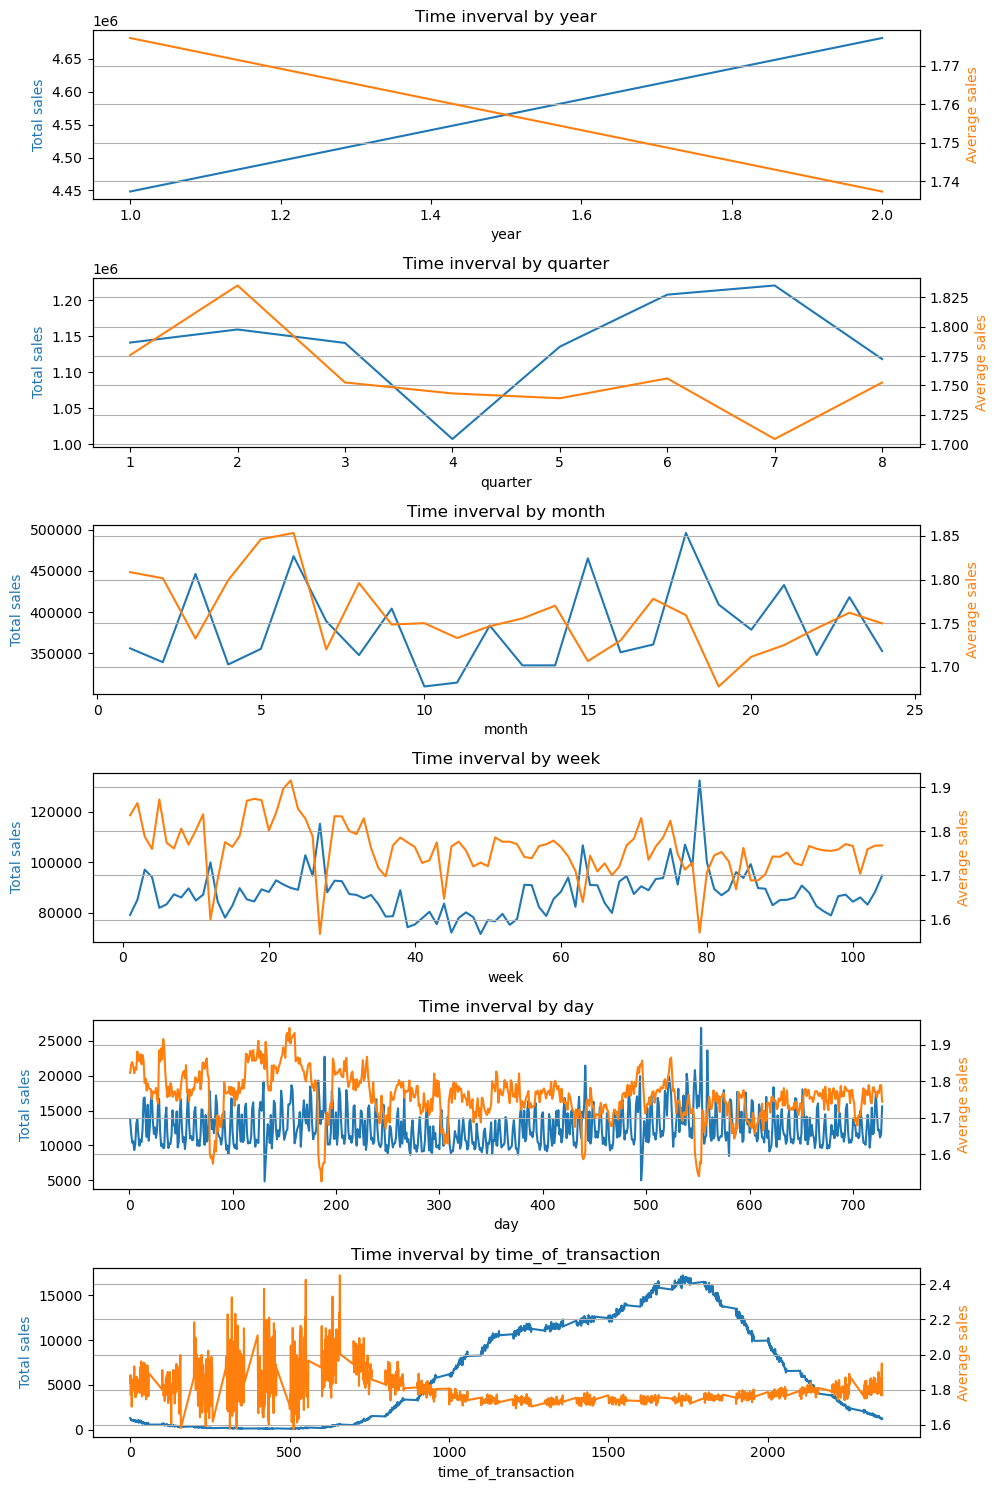

In [12]:
time_group = ['year', 'quarter', 'month', 'week', 'day', 'time_of_transaction']

plt.figure(figsize=(10,15))
for i, time in enumerate(time_group):
    ax1 = plt.subplot(6,1, i+1)
    plt.title('Time inverval by ' + str(time))
    ax1 = sb.lineplot(trans.groupby(time)['dollar_sales'].sum(), color='C0')
    ax1.set_ylabel('Total sales', color='C0')
    
    ax2 = ax1.twinx()
    ax2 = sb.lineplot(trans.groupby(time)['dollar_sales'].mean(), color='C1')
    ax2.set_ylabel('Average sales', color='C1')
    plt.grid()
    
plt.tight_layout()

In [13]:
time = 'year'
trans.groupby('year')['dollar_sales'].sum(), trans.groupby('year')['dollar_sales'].mean()

(year
 1    4448250.83
 2    4681829.06
 Name: dollar_sales, dtype: float64,
 year
 1    1.777256
 2    1.737354
 Name: dollar_sales, dtype: float64)

In [14]:
time = 'year'
tt_sales = trans.groupby('year')['dollar_sales'].sum().reset_index()
tt_sales

,year,dollar_sales
0,1,4448250.83
1,2,4681829.06


Text(0, 0.5, 'Sales')

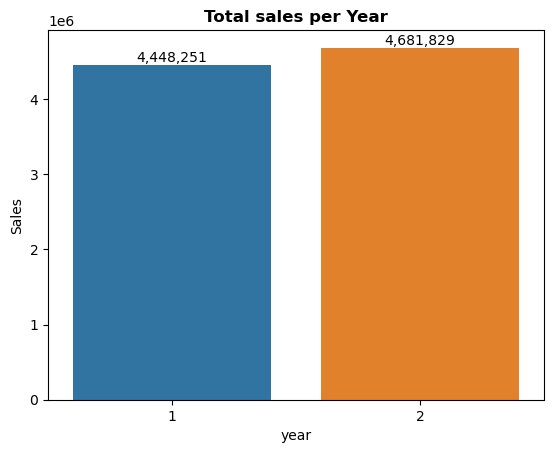

In [15]:
ax=sb.barplot(data = tt_sales, x='year', y='dollar_sales')
ax.bar_label(ax.containers[0], fontsize=10,fmt='{:,.0f}')
plt.title("Total sales per Year",fontweight="bold")
plt.ylabel("Sales")

## Sales by Year
### Total sales Growth by 5.25%
### Average sales decrease by 0.02%

## Sales by Q
### Total Sales drop on Q4 on both year
### Average sales drop since 1Y Q3

## Sales by Week/Day
### Main idea is to see effective to coupon campaign

## Sales by Transaction Analysis
### Main idea is to analysis time/traffic of transactions

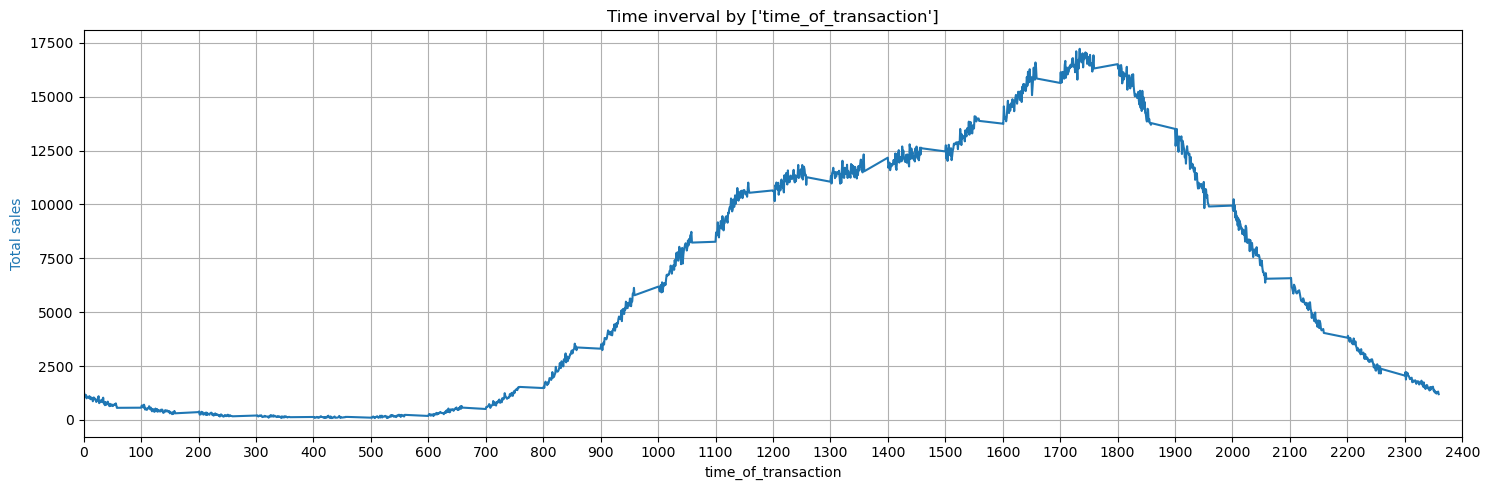

In [16]:
time = ['time_of_transaction']

plt.figure(figsize=(15,5))
plt.title('Time inverval by ' + str(time))
sb.lineplot(trans.groupby(time)['dollar_sales'].sum(), color='C0')
plt.ylabel('Total sales', color='C0')
plt.grid()   

plt.xlim(0,2400)
plt.xticks(np.linspace(0,2400,25))
plt.tight_layout()

In [80]:
#Add weekday time
trans['weekday'] = trans['day'] % 7

In [18]:
opr = trans.groupby(['time_of_transaction','weekday'])['dollar_sales'].sum().reset_index()
opr.head(8)

,time_of_transaction,weekday,dollar_sales
0,0,0,243.41
1,0,1,243.01
2,0,2,118.63
3,0,3,188.71
4,0,4,167.69
5,0,5,205.56
6,0,6,133.07
7,1,0,185.16


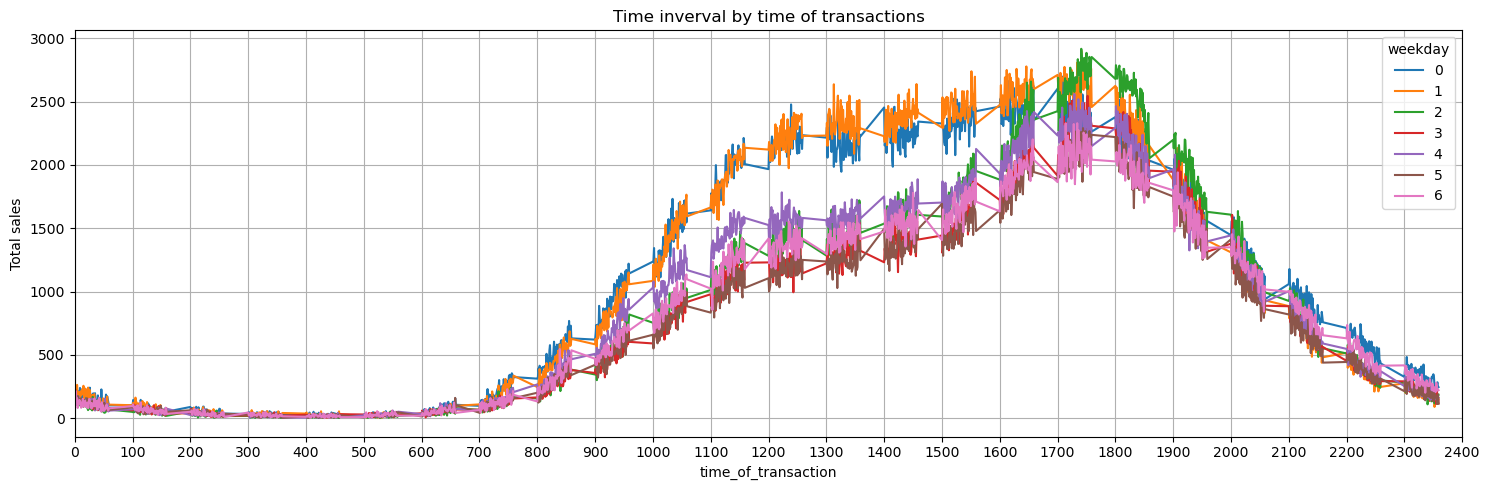

In [19]:
plt.figure(figsize=(15,5))
plt.title('Time inverval by time of transactions')
sb.lineplot(data=opr, x='time_of_transaction', y='dollar_sales', hue='weekday', palette="tab10")
plt.ylabel('Total sales')
plt.grid()   

plt.xlim(0,2400)
plt.xticks(np.linspace(0,2400,25))
plt.tight_layout()

# Sales by transaction summary
## -Sales peak time is at 17:30 on every weekday
## -day 0 and day 1 are overall sales higher than other 5, Most likely to be saturday and sunday
## -Sales increasing very fast since 9:00 to 11:00, and then again since 15:00 and reach peak at 17:30

In [20]:
#Modify weekday for easier understand
trans['weekday'].replace(0,'Saturday',inplace=True)
trans['weekday'].replace(1,'Sunday',inplace=True)
trans['weekday'].replace(2,'Monday',inplace=True)
trans['weekday'].replace(3,'Tuesday',inplace=True)
trans['weekday'].replace(4,'Wednesday',inplace=True)
trans['weekday'].replace(5,'Thurdsday',inplace=True)
trans['weekday'].replace(6,'Friday',inplace=True)
trans.groupby(['weekday'])['weekday'].count().to_frame()

,weekday
weekday,
Friday,672910
Monday,737498
Saturday,898446
Sunday,890695
Thurdsday,615351
Tuesday,647578
Wednesday,735203


In [21]:
opr = trans.groupby(['time_of_transaction','weekday'])['household'].nunique().reset_index()
opr

,time_of_transaction,weekday,household
0,0,Friday,47
1,0,Monday,46
2,0,Saturday,82
3,0,Sunday,82
4,0,Thurdsday,66
...,...,...,...
10075,2359,Saturday,81
10076,2359,Sunday,53
10077,2359,Thurdsday,48
10078,2359,Tuesday,45


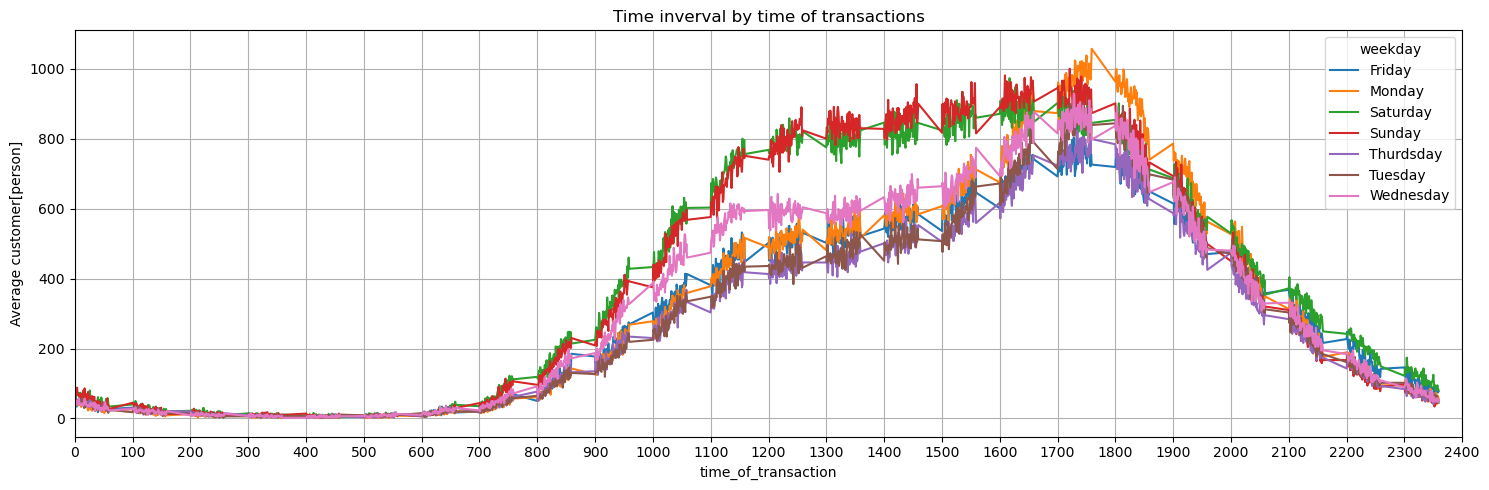

In [22]:
plt.figure(figsize=(15,5))
plt.title('Time inverval by time of transactions')
sb.lineplot(data=opr, x='time_of_transaction', y='household', hue='weekday', palette="tab10")
plt.ylabel('Average customer[person]')
plt.grid()   

plt.xlim(0,2400)
plt.xticks(np.linspace(0,2400,25))
plt.tight_layout()

<Axes: xlabel='week', ylabel='dollar_sales'>

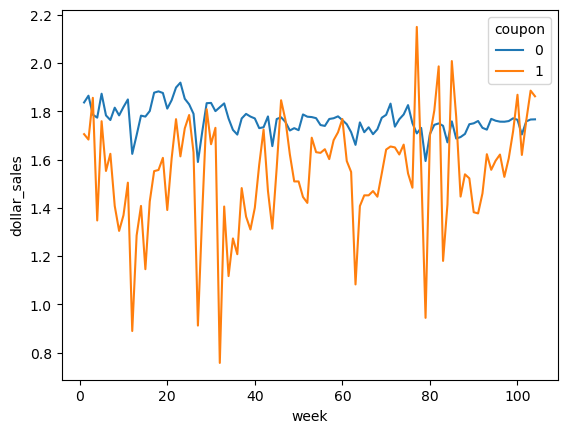

In [89]:
coup = trans.groupby(['week','coupon'])['dollar_sales'].mean().reset_index()
sb.lineplot(data=coup,x='week',y='dollar_sales',hue='coupon')

In [92]:
trans.groupby(['week','coupon'])['dollar_sales'].sum().reset_index()

,week,coupon,dollar_sales
0,1,0,78480.87
1,1,1,742.12
2,2,0,84561.52
3,2,1,678.47
4,3,0,95359.92
...,...,...,...
203,102,1,678.32
204,103,0,87658.61
205,103,1,503.67
206,104,0,94144.85


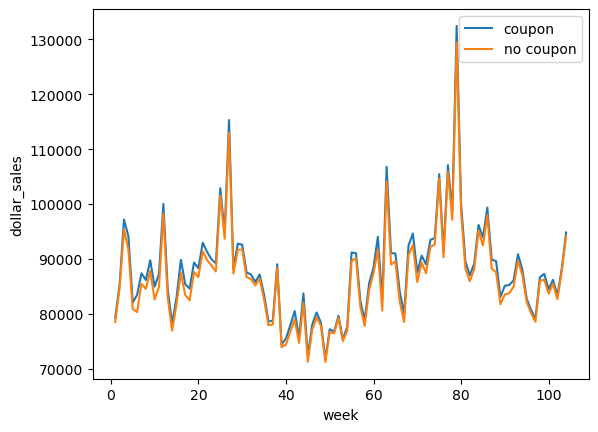

In [113]:
coup_s = trans.groupby(['week'])['dollar_sales'].sum().reset_index()
sb.lineplot(data=coup_s,x='week',y='dollar_sales', label='coupon')

ncoup_s = trans.groupby(['week','coupon'])['dollar_sales'].sum().reset_index()
ncoup_s = ncoup_s[ncoup_s['coupon'] == 0]
sb.lineplot(data=ncoup_s,x='week',y='dollar_sales',label='no coupon')
plt.legend()

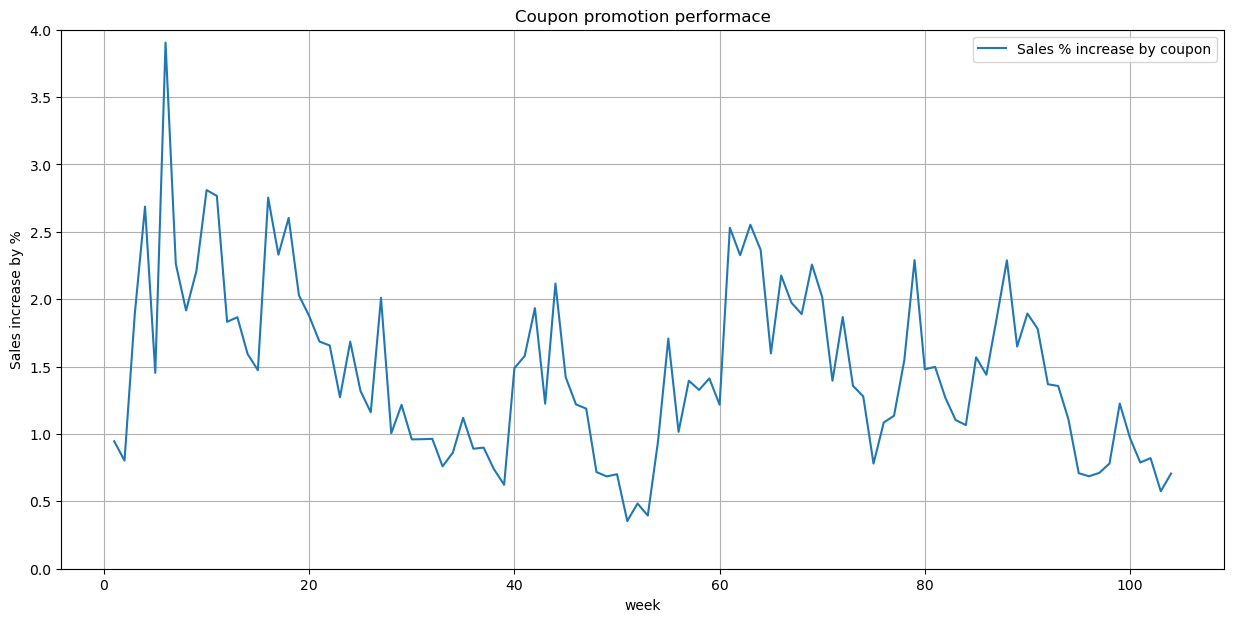

In [134]:
coup_s['Diff'] = coup_s['dollar_sales'] - coup_s['week'].map(ncoup_s.set_index('week')['dollar_sales'])
coup_s['Diff%'] = coup_s['Diff'] / coup_s['week'].map(ncoup_s.set_index('week')['dollar_sales']) * 100
plt.figure(figsize=(15,7))
sb.lineplot(data=coup_s,x='week',y='Diff%',label='Sales % increase by coupon')
plt.ylabel("Sales increase by %")
plt.title("Coupon promotion performace")
plt.ylim(0,4)
plt.grid()

In [137]:
coup_s['Diff%'].mean(),coup_s['Diff'].sum()

(1.4754110524874515, 133953.96999999997)

In [135]:
9999985004,3620000250

(9999985004, 3620000250)

# Distribution

In [24]:
sales_hh = trans.groupby('household')['dollar_sales'].mean().to_frame()
sales_b = trans.groupby('basket')['dollar_sales'].mean().to_frame()

In [25]:
sales_hh.describe().T

,count,mean,std,min,25%,50%,75%,max
dollar_sales,510027.0,1.771827,0.793854,-1.79,1.29,1.642857,2.071519,72.75


In [26]:
sales_b.describe().T

,count,mean,std,min,25%,50%,75%,max
dollar_sales,3316349.0,1.776625,1.034673,-3.01,1.045,1.58,2.19,153.14


Why there are some has negative value???????

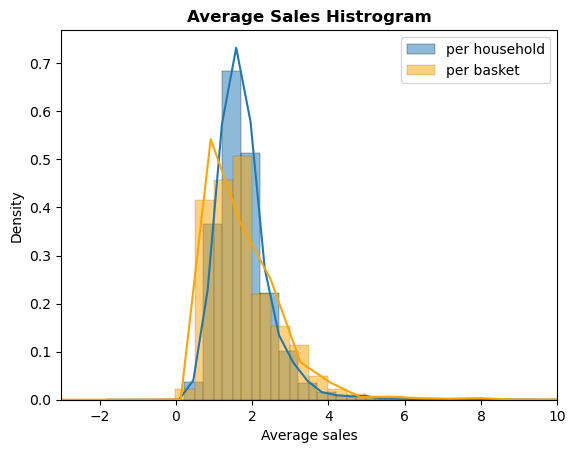

In [27]:
sb.histplot(sales_hh,x='dollar_sales',binwidth=0.5, kde=True,label='per household', stat='density')
sb.histplot(sales_b,x='dollar_sales',binwidth=0.5, kde=True,label='per basket',stat='density',color='orange')
plt.xlim(-3,10)
plt.title("Average Sales Histrogram", fontweight='bold')
plt.xlabel("Average sales")
plt.legend()

In [28]:
units_b = trans.groupby('basket')['units'].sum().to_frame()

In [29]:
units_b.describe().T

,count,mean,std,min,25%,50%,75%,max
units,3316349.0,1.875444,1.371887,1.0,1.0,1.0,2.0,217.0


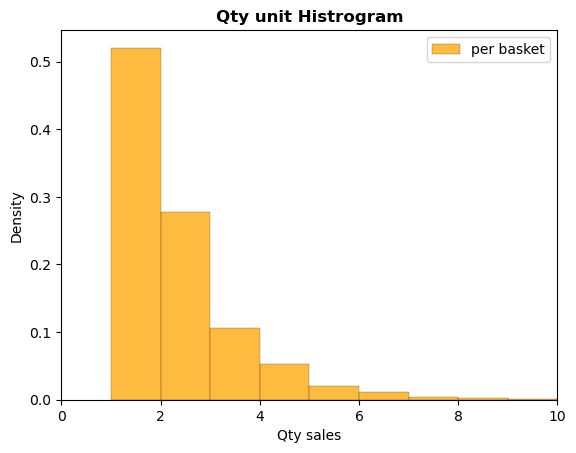

In [30]:
sb.histplot(units_b,x='units',binwidth=1,label='per basket',stat='density',color='orange')
plt.xlim(0,10)
plt.title("Qty unit Histrogram", fontweight='bold')
plt.xlabel("Qty sales")
plt.legend()

In [31]:
hh_repeat = trans.groupby('household')['basket'].count().to_frame()

In [32]:
hh_repeat.describe().T

,count,mean,std,min,25%,50%,75%,max
basket,510027.0,10.190992,14.934936,1.0,2.0,5.0,12.0,400.0


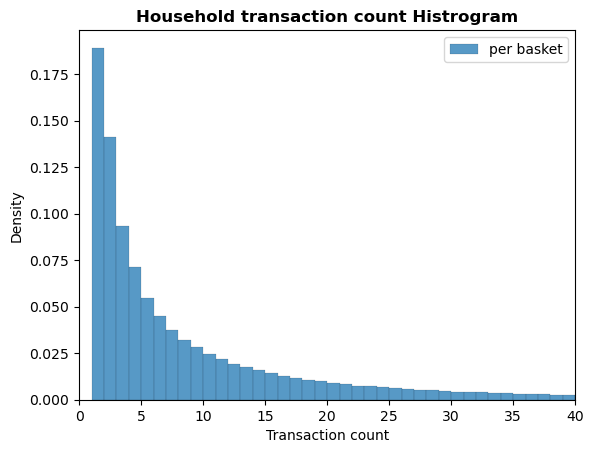

In [33]:
sb.histplot(hh_repeat,x='basket',binwidth=1,label='per basket',stat='density')
plt.xlim(0,40)
plt.title("Household transaction count Histrogram", fontweight='bold')
plt.xlabel("Transaction count")
plt.legend()

# What we know so far

# Product complimentary

In [34]:
group = pd.read_csv("dh_product_group.csv")
group

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,group upc
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,"7680850106,3620000470"
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,"7680850106,3620000470"
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,1800028064
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,9999985067
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,"9999985131,5100002794"
...,...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0,"9999985001,9999966720"
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0,"9999985001,9999966720"
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0,9999985027
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0,3620000300


In [35]:
group_count = group.groupby('group upc')['group upc'].count().to_frame()
group_count.rename(columns={"group upc": "group_count"},inplace=True)
group_count.drop_duplicates(inplace=True)
group_count

,group_count
group upc,
111112360,7
"111112360,2920000214",2
"111112360,4380045001,6971911331",3
1112600710,10
1112900013,44
...,...
"9999985261,9999967725",518
"9999985261,9999967727",1756
"9999985261,9999967728",602


In [36]:
group_count = group_count.reset_index()
group_count['product_count'] = list(map(lambda x: x.count(",")+1, group_count['group upc']))
group_count

,group upc,group_count,product_count
0,111112360,7,1
1,"111112360,2920000214",2,2
2,"111112360,4380045001,6971911331",3,3
3,1112600710,10,1
4,1112900013,44,1
...,...,...,...
927,"9999985261,9999967725",518,2
928,"9999985261,9999967727",1756,2
929,"9999985261,9999967728",602,2
930,9999985488,1090,1


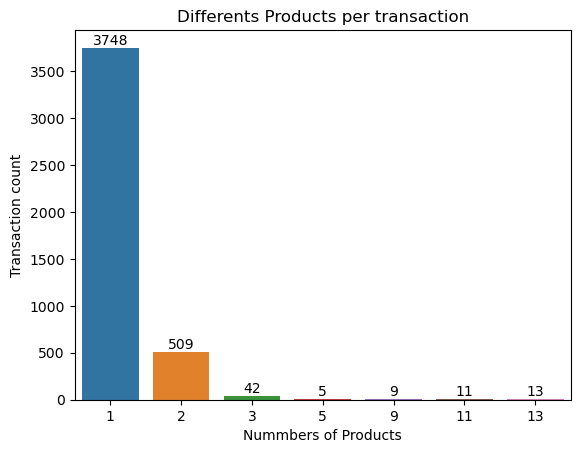

In [37]:
ax = sb.barplot(x='product_count',y='group_count', data=group_count,errorbar=None)
plt.ylabel('Transaction count')
plt.xlabel('Nummbers of Products')
plt.title('Differents Products per transaction')
for i in ax.containers:
    ax.bar_label(i,fmt='%.0f')

In [38]:
multi = group_count[group_count['product_count'] > 1]
multi

,group upc,group_count,product_count
1,"111112360,2920000214",2,2
2,"111112360,4380045001,6971911331",3,3
8,"1160000004,1600047090",4,2
9,"1160000004,1800028035",8,2
10,"1160000004,1800028064",34,2
...,...,...,...
924,"9999985260,9999967727",1276,2
926,"9999985261,9999966070",1488,2
927,"9999985261,9999967725",518,2
928,"9999985261,9999967727",1756,2


In [39]:
top10 = multi.sort_values(by='group_count', ascending=False)[:10]
top10['upc_a'] = top10['group upc'].str[0:10]
top10['upc_b'] = top10['group upc'].str[11:21]
top10['upc_a'] = top10['upc_a'].apply(lambda x: int(x))
top10['upc_b'] = top10['upc_b'].apply(lambda x: int(x))
top10 = top10.set_index('upc_a').join(prod.set_index('upc')[['product_description','commodity']].rename(columns={'product_description':'product_a','commodity':'commodity_a'}))
top10.reset_index(inplace=True)
top10 = top10.set_index('upc_b').join(prod.set_index('upc')[['product_description','commodity']].rename(columns={'product_description':'product_b','commodity':'commodity_b'}))
top10.reset_index(inplace=True)
top10.rename(columns={'group_count':'transaction_count'},inplace=True)
top10[['transaction_count','product_a','commodity_a','product_b','commodity_b']].sort_values(by='transaction_count',ascending=False)

,transaction_count,product_a,commodity_a,product_b,commodity_b
8,2858,RAGU\CHZ CREATION ALFRDO,pasta sauce,PRIVATE LABEL FETTUCCINI,pasta
4,2758,PRIVATE LABEL FETTUCCINI,pasta,RAGU\CHZ CREATION ALFRDO,pasta sauce
0,2466,PRIVATE LABEL SPAGHETTI REGULAR,pasta,RAGU TRADITIONAL PLAIN,pasta sauce
1,2418,PRIVATE LABEL THIN SPAGHETTI,pasta,RAGU TRADITIONAL PLAIN,pasta sauce
7,2408,RAGU TRADITIONAL PLAIN,pasta sauce,PRIVATE LABEL THIN SPAGHETTI,pasta
6,2380,RAGU TRADITIONAL PLAIN,pasta sauce,PRIVATE LABEL SPAGHETTI REGULAR,pasta
9,1794,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes
5,1756,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups
2,1704,PRIVATE LABEL SPAGHETTI REGULAR,pasta,RAGU OWS SPAG SAUCE MEAT,pasta sauce
3,1568,PRIVATE LABEL THIN SPAGHETTI,pasta,RAGU OWS SPAG SAUCE MEAT,pasta sauce


In [40]:
top10

,upc_b,upc_a,group upc,transaction_count,product_count,product_a,commodity_a,product_b,commodity_b
0,3620000250,9999985004,"9999985004,3620000250",2466,2,PRIVATE LABEL SPAGHETTI REGULAR,pasta,RAGU TRADITIONAL PLAIN,pasta sauce
1,3620000250,9999985020,"9999985020,3620000250",2418,2,PRIVATE LABEL THIN SPAGHETTI,pasta,RAGU TRADITIONAL PLAIN,pasta sauce
2,3620000300,9999985004,"9999985004,3620000300",1704,2,PRIVATE LABEL SPAGHETTI REGULAR,pasta,RAGU OWS SPAG SAUCE MEAT,pasta sauce
3,3620000300,9999985020,"9999985020,3620000300",1568,2,PRIVATE LABEL THIN SPAGHETTI,pasta,RAGU OWS SPAG SAUCE MEAT,pasta sauce
4,3620001369,9999985029,"9999985029,3620001369",2758,2,PRIVATE LABEL FETTUCCINI,pasta,RAGU\CHZ CREATION ALFRDO,pasta sauce
5,9999967727,9999985261,"9999985261,9999967727",1756,2,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups
6,9999985004,3620000250,"3620000250,9999985004",2380,2,RAGU TRADITIONAL PLAIN,pasta sauce,PRIVATE LABEL SPAGHETTI REGULAR,pasta
7,9999985020,3620000250,"3620000250,9999985020",2408,2,RAGU TRADITIONAL PLAIN,pasta sauce,PRIVATE LABEL THIN SPAGHETTI,pasta
8,9999985029,3620001369,"3620001369,9999985029",2858,2,RAGU\CHZ CREATION ALFRDO,pasta sauce,PRIVATE LABEL FETTUCCINI,pasta
9,9999985261,9999967727,"9999967727,9999985261",1794,2,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes


In [41]:
result = pd.read_csv("cluster label.csv")
result['Cluster'].loc[result['upc'] == 9999985004 ]

871    1
Name: Cluster, dtype: int64

In [42]:
x = multi.sort_values(by='product_count',ascending=False)[:10]
x

,group upc,group_count,product_count
81,"1510000027,1510000073,3620000441,3620000445,15...",13,13
163,"1510002702,3620000440,9999967728,3620000250,99...",11,11
20,"1160000004,9999985005,9999971297,9999971306,99...",9,9
14,"1160000004,2920000217,9999985021,2920000215,41...",5,5
287,"2700042274,2700042238,9999985020",69,3
49,"1510000007,1510000043,3620000300",21,3
238,"2700042238,2700042254,2700042274",51,3
54,"1510000007,1510000256,1510000073",15,3
230,"2700042232,2700042239,2700042274",27,3
401,"3620000217,9999985029,3620001369",105,3


In [43]:
x[x['product_count'] == 3]

,group upc,group_count,product_count
287,"2700042274,2700042238,9999985020",69,3
49,"1510000007,1510000043,3620000300",21,3
238,"2700042238,2700042254,2700042274",51,3
54,"1510000007,1510000256,1510000073",15,3
230,"2700042232,2700042239,2700042274",27,3
401,"3620000217,9999985029,3620001369",105,3


In [44]:
top10

,upc_b,upc_a,group upc,transaction_count,product_count,product_a,commodity_a,product_b,commodity_b
0,3620000250,9999985004,"9999985004,3620000250",2466,2,PRIVATE LABEL SPAGHETTI REGULAR,pasta,RAGU TRADITIONAL PLAIN,pasta sauce
1,3620000250,9999985020,"9999985020,3620000250",2418,2,PRIVATE LABEL THIN SPAGHETTI,pasta,RAGU TRADITIONAL PLAIN,pasta sauce
2,3620000300,9999985004,"9999985004,3620000300",1704,2,PRIVATE LABEL SPAGHETTI REGULAR,pasta,RAGU OWS SPAG SAUCE MEAT,pasta sauce
3,3620000300,9999985020,"9999985020,3620000300",1568,2,PRIVATE LABEL THIN SPAGHETTI,pasta,RAGU OWS SPAG SAUCE MEAT,pasta sauce
4,3620001369,9999985029,"9999985029,3620001369",2758,2,PRIVATE LABEL FETTUCCINI,pasta,RAGU\CHZ CREATION ALFRDO,pasta sauce
5,9999967727,9999985261,"9999985261,9999967727",1756,2,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups
6,9999985004,3620000250,"3620000250,9999985004",2380,2,RAGU TRADITIONAL PLAIN,pasta sauce,PRIVATE LABEL SPAGHETTI REGULAR,pasta
7,9999985020,3620000250,"3620000250,9999985020",2408,2,RAGU TRADITIONAL PLAIN,pasta sauce,PRIVATE LABEL THIN SPAGHETTI,pasta
8,9999985029,3620001369,"3620001369,9999985029",2858,2,RAGU\CHZ CREATION ALFRDO,pasta sauce,PRIVATE LABEL FETTUCCINI,pasta
9,9999985261,9999967727,"9999967727,9999985261",1794,2,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes


# Store and Geography

In [45]:
trans_store = trans.set_index('store').join(store.set_index('store')).reset_index()
trans_store

,store,upc,dollar_sales,units,time_of_transaction,geography,week,household,basket,day,coupon,year,month,quarter,weekday,store_zip_code
0,1,9999985133,0.78,2,822,1,1,31932,223050,1,0,1,1,1,Sunday,37865
1,1,3000005300,4.58,2,1030,1,1,245712,223051,1,0,1,1,1,Sunday,37865
2,1,3620000444,1.99,1,1031,1,1,282188,223052,1,0,1,1,1,Sunday,37865
3,1,5100002549,1.99,1,1214,1,1,242208,223053,1,0,1,1,1,Sunday,37865
4,1,9999985027,4.47,3,1214,1,1,242208,223053,1,0,1,1,1,Sunday,37865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197676,387,6738703055,2.29,1,2029,1,104,508020,3316123,726,0,2,24,8,Thurdsday,37748
5197677,387,9505900020,1.99,1,2029,1,104,508020,3316123,726,0,2,24,8,Thurdsday,37748
5197678,387,6738703009,2.29,1,2029,1,104,508020,3316123,726,0,2,24,8,Thurdsday,37748
5197679,387,3620000470,4.00,2,2139,1,104,285677,3316124,726,0,2,24,8,Thurdsday,37748


In [46]:
store_traffic = trans_store.groupby(['quarter','store'])['basket'].nunique().to_frame()
store_traffic['total'] = trans_store.groupby(['quarter','store'])['dollar_sales'].sum().to_frame()
store_traffic

basket    total
quarter store                 
1       1        1095  3039.98
        2        1194  3194.89
        3        1205  3473.16
        4         854  2177.95
        5        1653  4558.43
...               ...      ...
8       382       705  1889.05
        383      1110  3038.21
        384       569  1538.96
        386      1483  4146.63
        387       304   811.86

[2996 rows x 2 columns]

In [47]:
store_s = trans_store.groupby(['store'])['dollar_sales'].sum().to_frame()
store_s.describe()

,dollar_sales
count,387.00000
mean,23591.93770
std,10341.57388
min,811.86000
25%,16615.37500
50%,22568.00000
75%,29539.65500
max,63611.85000


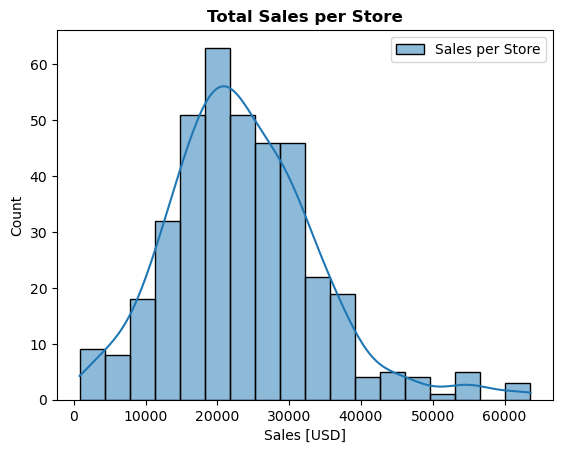

In [48]:
sb.histplot(store_s,x='dollar_sales',label='Sales per Store',kde=True)
#plt.xlim(15000,34000)
plt.title("Total Sales per Store", fontweight='bold')
plt.xlabel("Sales [USD]")
plt.legend()

In [49]:
#GEOGRAPHY

# Product Analysis

In [50]:
#Join transaction and product data for identify champion product analysis
trans_prod = trans.set_index('upc').join(prod.set_index('upc'))
trans_prod.head(5)

,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,year,month,quarter,weekday,product_description,commodity,brand,product_size
upc,,,,,,,,,,,,,,,,,,
111112360,5.59,1,2116,1,13,197660,182,330724,90,0,1,3,1,Friday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
111112360,4.99,1,2130,1,23,221275,22,487026,156,0,1,6,2,Monday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
111112360,5.99,1,1739,1,25,215652,164,522090,171,0,1,6,2,Tuesday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
111112360,5.99,1,1448,1,26,215056,139,550468,182,0,1,6,2,Saturday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
111112360,11.58,2,1806,1,27,215056,139,564425,186,0,1,7,3,Wednesday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ


In [51]:
trans_prod.shape

(5197681, 18)

In [52]:
com_sales = trans_prod.groupby('commodity')['dollar_sales'].sum().reset_index()
com_sales

,commodity,dollar_sales
0,pancake mixes,511814.31
1,pasta,2851930.56
2,pasta sauce,4025026.48
3,syrups,1741308.54


Text(0.5, 1.0, 'Sales by Product Category')

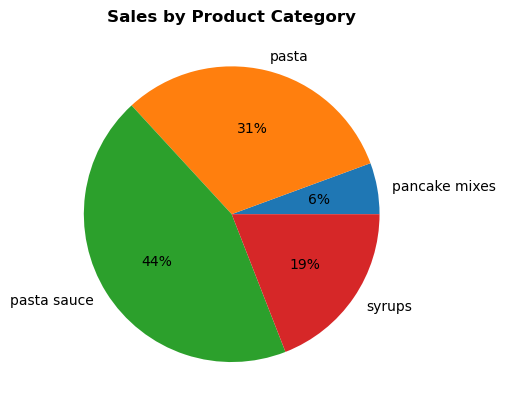

In [53]:
plt.pie(x=com_sales['dollar_sales'], labels=com_sales['commodity'], autopct='%.0f%%')
plt.title('Sales by Product Category',fontweight='bold')

This retail income mostly are from Pasta and sauce 75% let's focus on these 2

let's clean product data first

In [54]:
prodc = pd.read_csv('dh_product_clean.csv')
prodc

,upc,product_description,commodity,brand,product_size,commodity_codes,brand_codes
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0,2,126
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40.0,3,100
2,566300028,MILLER CANE SYRUP,syrups,Miller,19.0,3,81
3,566300029,MILLER CANE SYRUP,syrups,Miller,12.0,3,81
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19.0,3,100
...,...,...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16.0,1,104
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0,0,104
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0,0,104
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16.0,1,105


In [55]:
#Join transaction and product data for identify champion product analysis
trans_prod = trans.set_index('upc').join(prodc.set_index('upc')).reset_index()
trans_prod.head(5)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,...,year,month,quarter,weekday,product_description,commodity,brand,product_size,commodity_codes,brand_codes
0,111112360,5.59,1,2116,1,13,197660,182,330724,90,...,1,3,1,Friday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0,2,126
1,111112360,4.99,1,2130,1,23,221275,22,487026,156,...,1,6,2,Monday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0,2,126
2,111112360,5.99,1,1739,1,25,215652,164,522090,171,...,1,6,2,Tuesday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0,2,126
3,111112360,5.99,1,1448,1,26,215056,139,550468,182,...,1,6,2,Saturday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0,2,126
4,111112360,11.58,2,1806,1,27,215056,139,564425,186,...,1,7,3,Wednesday,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0,2,126


In [56]:
trans_prod.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon', 'year',
       'month', 'quarter', 'weekday', 'product_description', 'commodity',
       'brand', 'product_size', 'commodity_codes', 'brand_codes'],
      dtype='object')

In [57]:
col_sel = ['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon',
       'month', 'weekday', 'product_size', 'commodity_codes', 'brand_codes']
champ = trans_prod[col_sel]

In [58]:
#Modify weekday for easier understand
champ['weekday'].replace('Saturday', 0, inplace=True)
champ['weekday'].replace('Sunday', 1, inplace=True)
champ['weekday'].replace('Monday', 2, inplace=True)
champ['weekday'].replace('Tuesday', 3, inplace=True)
champ['weekday'].replace('Wednesday', 4, inplace=True)
champ['weekday'].replace('Thurdsday', 5, inplace=True)
champ['weekday'].replace('Friday', 6, inplace=True)

In [59]:
champ.head(5)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,month,weekday,product_size,commodity_codes,brand_codes
0,111112360,5.59,1,2116,1,13,197660,182,330724,90,0,3,6,25.0,2,126
1,111112360,4.99,1,2130,1,23,221275,22,487026,156,0,6,2,25.0,2,126
2,111112360,5.99,1,1739,1,25,215652,164,522090,171,0,6,3,25.0,2,126
3,111112360,5.99,1,1448,1,26,215056,139,550468,182,0,6,0,25.0,2,126
4,111112360,11.58,2,1806,1,27,215056,139,564425,186,0,7,4,25.0,2,126


Text(0.5, 1.0, 'Feature correlation')

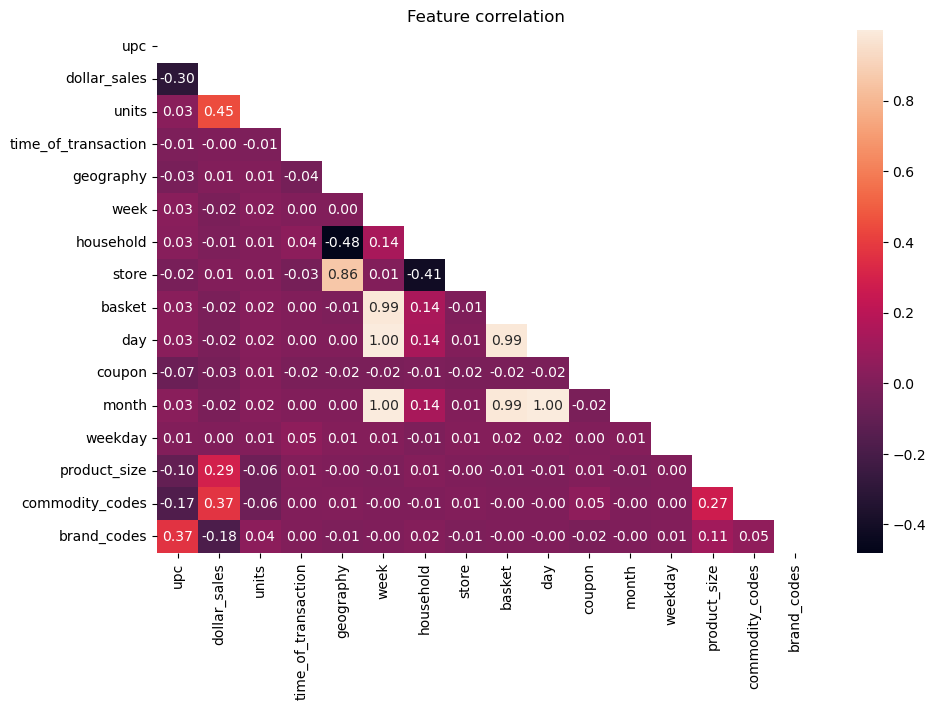

In [60]:
plt.figure(figsize=(10,7))
prod_corr = champ.corr()
mask = np.triu(prod_corr)
sb.heatmap(prod_corr, mask=mask, annot=True, fmt='.2f')
plt.tight_layout()
plt.title('Feature correlation')

In [61]:
### Diagnostic